In [1]:
from create_data import DumbCirc as dc
from create_data_single import Dumb as db
from create_data_single import Circ as cc
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = cc(0.4, 0.4, 0.2, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [100], [0.2], True, 10)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=5, grid_size=125, negative_cloud=fnc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_bin.set_device(device)

In [6]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.00005, kind='b')

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:231: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 10.923060099283854
Epoch:1, Loss: 13.013629807366264
Epoch:2, Loss: 14.635373398109719
Epoch:3, Loss: 14.386526519869582
Epoch:4, Loss: 13.726452011139797
Epoch:5, Loss: 12.685370967875457
Epoch:6, Loss: 13.407235955559722
Epoch:7, Loss: 14.36695094087505
Epoch:8, Loss: 14.949608468939145
Epoch:9, Loss: 15.135762739158102


In [7]:
model_bin.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.9600e-01, 9.8413e-01,  ..., 8.2848e-02, 5.7466e-05,
         8.1818e-07],
        [9.9600e-01, 1.0000e+00, 9.9601e-01,  ..., 9.2498e-02, 7.9915e-05,
         1.2109e-06],
        [9.8413e-01, 9.9601e-01, 1.0000e+00,  ..., 1.0245e-01, 1.1022e-04,
         1.7774e-06],
        ...,
        [8.2848e-02, 9.2498e-02, 1.0245e-01,  ..., 1.0000e+00, 5.8274e-04,
         3.8733e-05],
        [5.7466e-05, 7.9915e-05, 1.1022e-04,  ..., 5.8274e-04, 1.0000e+00,
         5.6258e-01],
        [8.1818e-07, 1.2109e-06, 1.7774e-06,  ..., 3.8733e-05, 5.6258e-01,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 0.0065,  0.0060,  0.0052,  ..., -0.0064, -0.0068, -0.0072],
       grad_fn=<MvBackward0>)


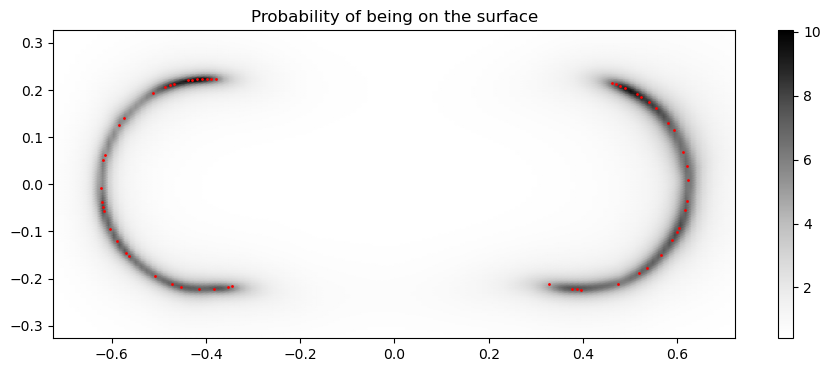

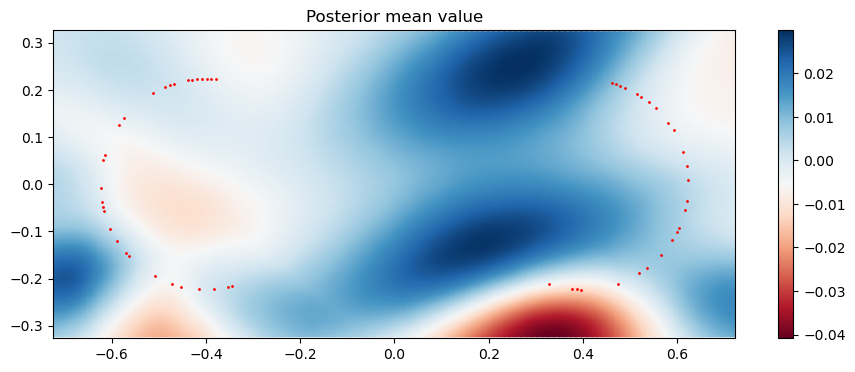

In [8]:
model_bin.predict()

In [9]:
model_bin.set_test_data(pc[1:3, :], lp[1:3, :])

tensor([[1.0000e+00, 9.9809e-01, 9.9238e-01,  ..., 1.1816e-02, 7.0947e-10,
         1.6095e-01],
        [9.9809e-01, 1.0000e+00, 9.9809e-01,  ..., 1.4146e-02, 1.0454e-09,
         1.7986e-01],
        [9.9238e-01, 9.9809e-01, 1.0000e+00,  ..., 1.6869e-02, 1.5342e-09,
         2.0022e-01],
        ...,
        [1.1816e-02, 1.4146e-02, 1.6869e-02,  ..., 1.0000e+00, 1.5500e-03,
         5.3470e-01],
        [7.0947e-10, 1.0454e-09, 1.5342e-09,  ..., 1.5500e-03, 1.0000e+00,
         2.2618e-05],
        [1.6095e-01, 1.7986e-01, 2.0022e-01,  ..., 5.3470e-01, 2.2618e-05,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0332, -0.0353, -0.0373,  ...,  0.0108,  0.0096,  0.0086],
       grad_fn=<MvBackward0>)
tensor([[1.0000e+00, 9.9713e-01, 9.8856e-01,  ..., 5.3960e-10, 3.8896e-02,
         1.9211e-02],
        [9.9713e-01, 1.0000e+00, 9.9713e-01,  ..., 8.7085e-10, 4.6153e-02,
         2.3177e-02],
        [9.8856e-01, 9.9713e-01, 1.0000e+00,  ..., 1.3975e-09, 5.4454e-02,
         2.7

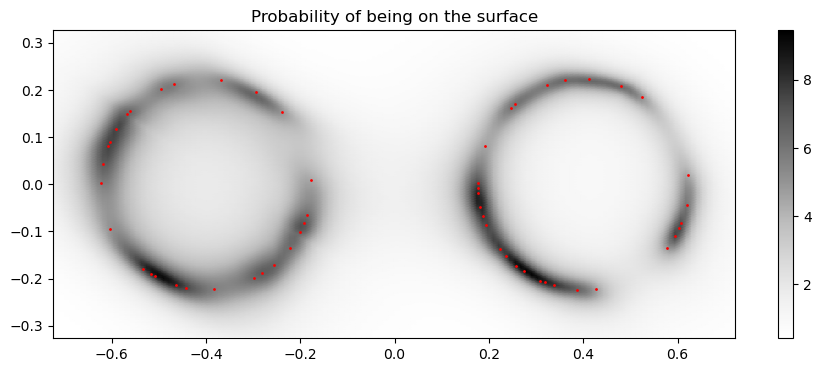

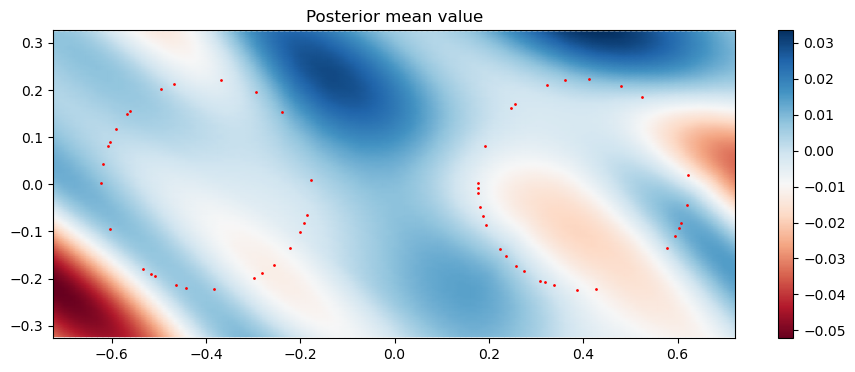

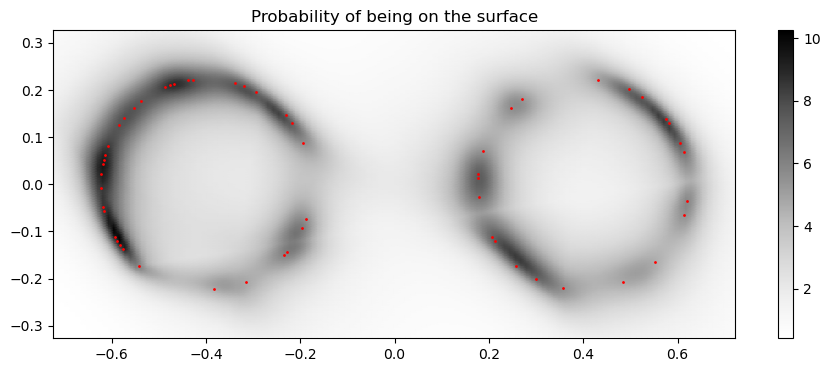

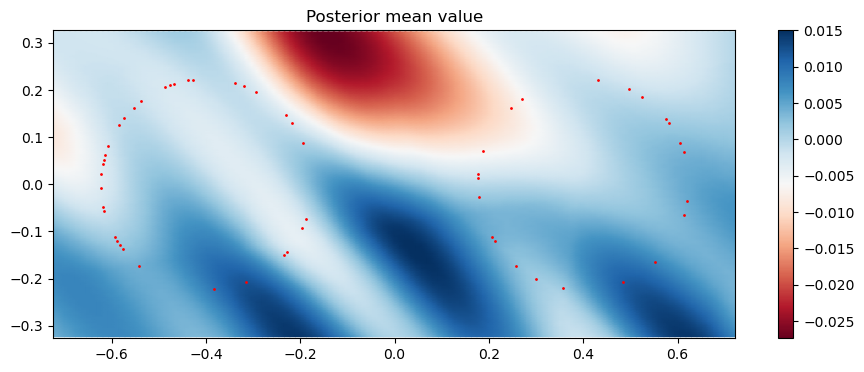

In [10]:
model_bin.predict()